In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
games = 'scrabble_train_tpr_no.csv'
gamesdf = pd.read_csv(games, header=0, index_col=0)

print(gamesdf)


         nickname1   nickname2  score1  score2  max1  max2  median1  median2  \
game_id                                                                        
8         HastyBot  AliSalman1     528     414    76    83     33.0     23.0   
10       BetterBot     squashy     415     299    68    65     12.0     10.0   
15         STEEBot  meetsumeet     451     403    62    62     21.0     23.0   
16       BetterBot       Mimix     385     418    75    71     13.0     20.0   
22        HastyBot       NoelL     426     458    67    61     22.5     21.0   
...            ...         ...     ...     ...   ...   ...      ...      ...   
72763    BetterBot     kar2008     330     537    67    89     15.0     23.0   
72765    BetterBot    patricck     334     454    54    75     11.5     19.5   
72766      STEEBot      Glilac     457     449    76   124     22.0     13.0   
72767    BetterBot      HAYDEN     414     340    66    77     16.0     10.5   
72773     HastyBot       adola     346  

In [8]:
data = gamesdf

y = data.iloc[:, -1]
X = data.drop(data.columns[[-1, 0, 1]], axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_indices = X.index.values
y_indices = y.index.values

print(X)
print(y)

         score1  score2  max1  max2  median1  median2  sum1  sum2  tpr_10_2  \
game_id                                                                       
8           528     414    76    83     33.0     23.0   422   328    2007.5   
10          415     299    68    65     12.0     10.0   309   214    1879.5   
15          451     403    62    62     21.0     23.0   336   319    1916.4   
16          385     418    75    71     13.0     20.0   287   326    2060.8   
22          426     458    67    61     22.5     21.0   336   360    2226.5   
...         ...     ...   ...   ...      ...      ...   ...   ...       ...   
72763       330     537    67    89     15.0     23.0   238   441    1612.1   
72765       334     454    54    75     11.5     19.5   236   364    1907.8   
72766       457     449    76   124     22.0     13.0   355   361    2199.2   
72767       414     340    66    77     16.0     10.5   312   267    1655.3   
72773       346     383    36    81     20.0     15.

In [10]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'base_estimator__max_depth': [None], 
    'n_estimators': [ 100],  
    'learning_rate': [.001], 
  
}

# Create the base Decision Tree Regressor
base_estimator = DecisionTreeRegressor()

# Create the AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(adaboost_regressor, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_adaboost_regressor = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_adaboost_regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse)

Best Hyperparameters: {'base_estimator__max_depth': None, 'learning_rate': 0.001, 'n_estimators': 500}
Mean Squared Error (MSE): 14514.191940126655


C:\Users\Nick_\AppData\Local\Temp\ipykernel_10000\121083039.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')


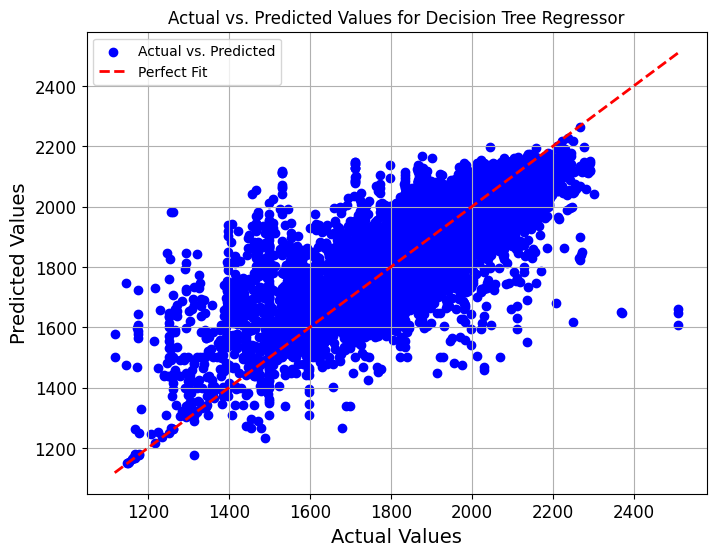

In [11]:
import matplotlib.pyplot as plt

# Assuming you have the actual target values in y_test and predicted values in y_pred (from the best model)

# Create a scatter plot to show the best-fit predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Decision Tree Regressor')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()